In [1]:
import pandas as pd

In [48]:
df=pd.read_csv("DatosxGenero.csv")
df=df[df.metric=="Rate"]
df=df[(df.measure=="YLLs (Years of Life Lost)") | (df.measure=="DALYs (Disability-Adjusted Life Years)")]

In [49]:
df=df[["measure","sex","cause","val"]]
df

,measure,sex,cause,val
0,YLLs (Years of Life Lost),Male,Multidrug-resistant tuberculosis without exten...,6.115373
1,YLLs (Years of Life Lost),Female,Multidrug-resistant tuberculosis without exten...,3.207379
2,YLLs (Years of Life Lost),Both,Multidrug-resistant tuberculosis without exten...,4.628608
3,YLLs (Years of Life Lost),Male,Extensively drug-resistant tuberculosis,1.007689
4,YLLs (Years of Life Lost),Female,Extensively drug-resistant tuberculosis,0.529315
...,...,...,...,...
2394,DALYs (Disability-Adjusted Life Years),Female,Chronic kidney disease due to diabetes mellitu...,119.208334
2395,DALYs (Disability-Adjusted Life Years),Both,Chronic kidney disease due to diabetes mellitu...,129.302522
2396,DALYs (Disability-Adjusted Life Years),Male,Refraction disorders,88.611820
2397,DALYs (Disability-Adjusted Life Years),Female,Refraction disorders,111.011555


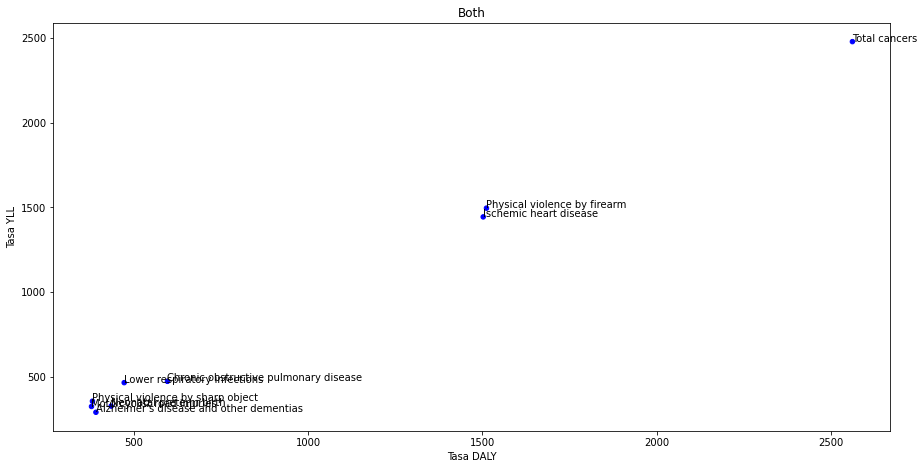

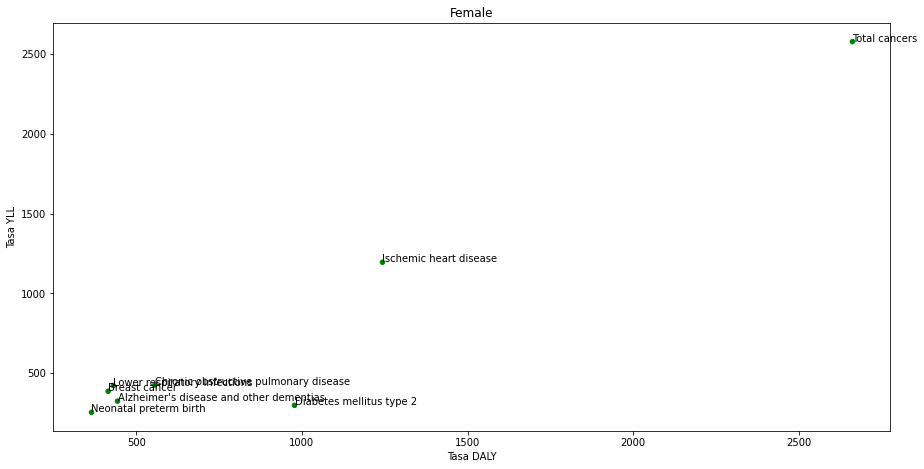

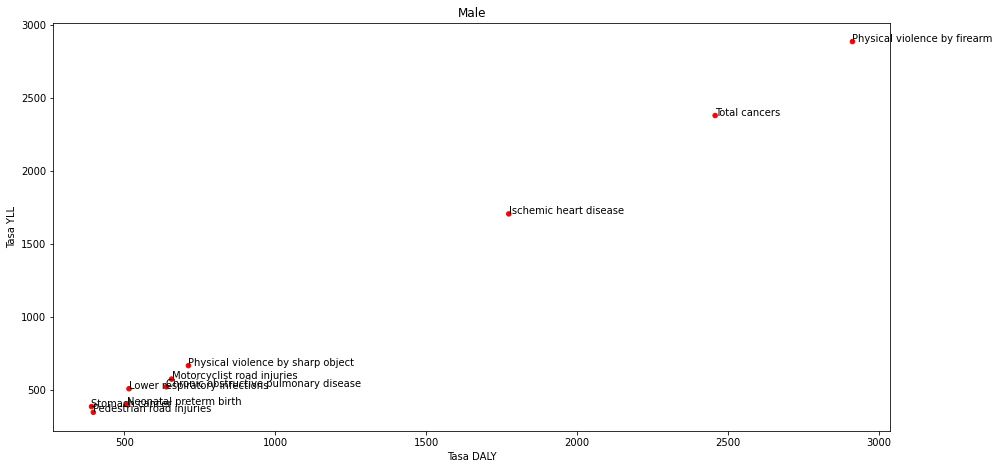

In [92]:
lst=list()

cont=1
for i in set(list(df.sex)):
    df_left=df[(df.measure=="DALYs (Disability-Adjusted Life Years)") & (df.sex==i)]
    df_right=df[(df.measure=="YLLs (Years of Life Lost)") & (df.sex==i)]
    df_left=df_left[df_left.val > df_left.val.quantile(.95)]
    df_right=df_right[df_right.val > df_right.val.quantile(.95)]
    df_res=df_left.merge(df_right, left_on='cause', right_on='cause')
    lst.append(df_res)
    #lst.append(df_res.sort_values(by=['val_x',"val_y"]).head(5))
    fig, ax1 =plt.subplots(figsize=(15,7.5))
    df_res["col"]=i
    
    col = df_res.col.map({"Both":'b', "Male":'r',"Female":"g"})
    df_res.plot.scatter(x='val_x',y='val_y',c=col, ax=ax1)
    cont+=1
    ax1.set_xlabel('Tasa DALY')
    ax1.set_ylabel('Tasa YLL')
    ax1.title.set_text(i)
    for idx, row in df_res.iterrows():
        ax1.annotate(row['cause'], (row['val_x'], row['val_y']) )
    plt.savefig(str(i)+".jpg")
    plt.show()

In [71]:
df_final=pd.concat(lst)
df_final.sort_values(by=['val_x'],ascending=False)

,measure_x,sex_x,cause,val_x,measure_y,sex_y,val_y
4,DALYs (Disability-Adjusted Life Years),Male,Physical violence by firearm,2911.072791,YLLs (Years of Life Lost),Male,2883.129656
6,DALYs (Disability-Adjusted Life Years),Female,Total cancers,2661.751637,YLLs (Years of Life Lost),Female,2577.217268
7,DALYs (Disability-Adjusted Life Years),Both,Total cancers,2561.390678,YLLs (Years of Life Lost),Both,2479.572003
7,DALYs (Disability-Adjusted Life Years),Male,Total cancers,2456.401913,YLLs (Years of Life Lost),Male,2377.424158
5,DALYs (Disability-Adjusted Life Years),Male,Ischemic heart disease,1773.021067,YLLs (Years of Life Lost),Male,1704.328504
4,DALYs (Disability-Adjusted Life Years),Both,Physical violence by firearm,1511.484143,YLLs (Years of Life Lost),Both,1495.827559
5,DALYs (Disability-Adjusted Life Years),Both,Ischemic heart disease,1502.159690,YLLs (Years of Life Lost),Both,1444.192137
5,DALYs (Disability-Adjusted Life Years),Female,Ischemic heart disease,1243.237624,YLLs (Years of Life Lost),Female,1195.522335
7,DALYs (Disability-Adjusted Life Years),Female,Diabetes mellitus type 2,977.923656,YLLs (Years of Life Lost),Female,299.567097
6,DALYs (Disability-Adjusted Life Years),Male,Physical violence by sharp object,711.990417,YLLs (Years of Life Lost),Male,666.127100


In [77]:
df_final.sort_values(by=['val_y'],ascending=False).to_csv("Final.csv")

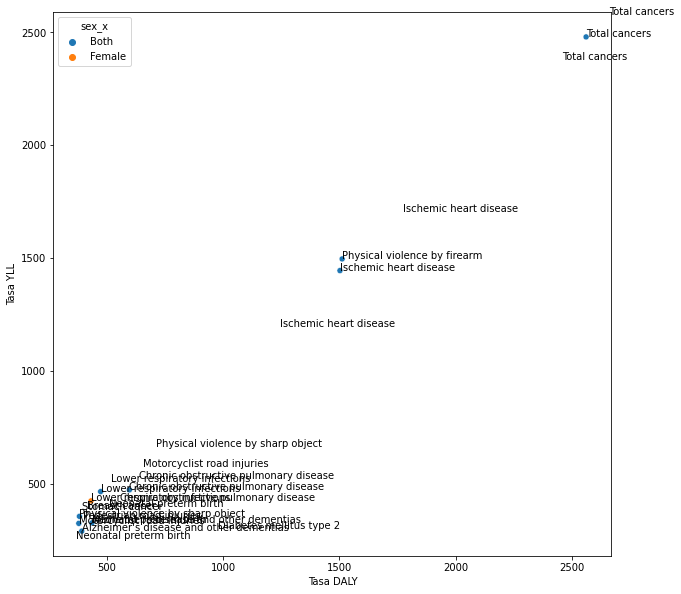

In [79]:
import seaborn as sns
fig, ax1 =plt.subplots(figsize=(10,10))
fg = sns.scatterplot(data=df_final, x="val_x", y="val_y",hue="sex_x", ax=ax1)
ax1.set_xlabel('Tasa DALY')
ax1.set_ylabel('Tasa YLL')
for idx, row in df_final.iterrows():
    ax1.annotate(row['cause'], (row['val_x'], row['val_y']) )